<a href="https://colab.research.google.com/github/starkjones/Python-Data-Science-Fundamentals-/blob/main/B_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DIABETES ANALYSIS**

Jonathan Jones

22.05.11

**EXAM RUBRIC:**

(.5) Inconsistencies in categories checked and handled if necessary
(.25) Outliers checked and handled if necessary
(.25) Data types checked and handled if necessary
(.25) Duplicate rows checked and handled if necessary
General:
(.5) Includes exploratory visualization - #1 
(.25) Interprets visualization #1
(.5) Includes exploratory visualization - #2
(.25) Interprets visualization #2
(3) Splits data into training and testing set
(2) Missing values are identified & imputed
(.25) Justifies strategy for handling missing values
(.5) Avoids data leakage
(1) Categorical variables are converted to numeric for modeling
(.25) Justifies encoding choices (ordinal vs one-hot encoding)
(.25) Scales data if using model that requires scaling
(2) Fits valid algorithm #1
(.25) Tunes hyperparameters of algorithm #1
(.5) Fits valid algorithm #2
(.25) Tunes hyperparameters of algorithm #2
(.5) Uses pipeline(s) for preprocessing and modeling
(2) Evaluates model using valid metric
(.25) Justifies final model choice
Other:
(.5) File Reqts: Python code for data cleaning
(.5) File Reqts: Python code for EDA
(.5) File Reqts: Python code for modeling
(.25) Code: Organization, structure, indentation, comments
(.25) Code: Unnecessary code or methods
(.25) Code: Unused modeling or evaluation metric imports
(.25) Code: Errors left in code output
(.25) Modeling: inappropriate models or metrics imported/used
(.25) Code: Unnecessary files

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = '/content/drive/MyDrive/Colab Notebooks/Week 7/Belt2_B_diabetes_v2_final.csv'
df = pd.read_csv(data)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0
5,7,125.0,86.0,NaN,NaN,0.304,obese_2,45 - 64,F,0
6,1,106.0,76.0,NaN,NaN,0.19699999999999998,obese_2,18 - 44,F,0
7,6,105.0,80.0,28.0,NaN,0.878,obese_1,18 - 44,F,0
8,7,159.0,64.0,NaN,NaN,0.294,overweight,18 - 44,F,0
9,7,81.0,78.0,40.0,48.0,0_261,obsese_3,18 - 44,F,0


In [3]:
# Unadulterated copy for Machine Learning:

dfML = df.copy()

In [4]:
df.shape

# 10 columns
# 642 rows

(642, 10)

##**DATA CLEANING & PREPARATION**

In [5]:
# Check for duplicated rows:

df.duplicated().sum()

3

In [6]:
# Removal of duplicated rows and final check:

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [7]:
# Overview of dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   635 non-null    float64
 2   BloodPressure             613 non-null    float64
 3   SkinThickness             454 non-null    float64
 4   Insulin                   330 non-null    float64
 5   DiabetesPedigreeFunction  639 non-null    object 
 6   WeightGroup               639 non-null    object 
 7   AgeGroup                  639 non-null    object 
 8   Gender                    639 non-null    object 
 9   Outcome                   639 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 54.9+ KB


There should only be one float column, Diabetes Pedigree Function, three object columns, Weight Group, Age Group and Gender, and the rest of the columns should be (int) data types. 

In [8]:
# Chaning column text to lower case for ease with future referencing:

df.columns = df.columns.str.lower()

In [9]:
# Check for missing values: 

df.isna().sum()

pregnancies                   0
glucose                       4
bloodpressure                26
skinthickness               185
insulin                     309
diabetespedigreefunction      0
weightgroup                   0
agegroup                      0
gender                        0
outcome                       0
dtype: int64

**TOTAL ENTRIES : 639**

glucose [int] is missing 4/639 or 00.63% of its values.

bloodpressure [int] is missing 26/639 or 04.07% of its values.

skinthickness [int] is missing 185/639 or 29.00% of its values.

insulin [int] is missing 309/639 or 48.40% of its values. 

**IMPUTATION STRATEGY:**

We will use median for glucose and bloodpressure columns because they are missing such a small percentage of their values that the error induced by this strategy will be insignificant. 

Skinthickness and insulin are missing a lot of their data; close to one third and one half respectively. We will use a rounded mean to replace the missing values. 


In [10]:
# Imputation for glucose and bloodpressure:

glucose = round(df['glucose'].median(),0)
glucose

bp = round(df['bloodpressure'].median(),0)
bp

df['glucose'].fillna(glucose, inplace =True)

df['bloodpressure'].fillna(bp, inplace =True)

# glucose = 99.0
# bp = 70.0

In [11]:
# Imputation for skin thickness:
insulin = round(df['skinthickness'].mean(),0)

df['skinthickness'].fillna(insulin, inplace = True)

df['skinthickness'].values

array([31., 35., 33., 39., 29., 29., 29., 28., 29., 40., 20., 32., 29.,
       43., 27., 37., 18., 40., 29., 29., 35., 19., 30., 12., 29., 13.,
       29., 40., 35., 26., 23., 26., 36., 30., 52., 36., 29., 24., 32.,
       30., 27., 33., 27., 23., 29., 27., 25., 32., 50., 16., 38., 18.,
       29., 29., 50., 13., 26., 29., 40., 47., 35., 32., 23., 41., 30.,
       27., 20., 30., 17., 15., 29., 29., 26., 15., 28., 19., 37., 41.,
       23., 29., 20., 29., 29., 21., 18., 29., 36., 29., 32., 29., 29.,
       12., 20., 15., 29., 19., 10., 39., 33., 13., 29., 26., 41., 17.,
       18., 29., 35., 22., 12., 29., 11., 15., 29., 28., 39., 24., 19.,
       13., 29., 40., 24., 18., 39., 32., 33., 21., 37., 19., 23., 29.,
       30., 29., 33., 29., 22., 38., 37., 29., 31., 15., 25., 46., 29.,
       26., 29., 19., 41., 29., 23., 29., 22., 29., 29., 29., 23., 29.,
       29., 29., 54., 13., 29., 17., 29., 41., 24., 29., 29., 35.,  7.,
       46., 29., 24., 25., 20., 28., 12., 27., 29., 29., 11., 33

In [12]:
# Imputation for insulin:
insulin = round(df['insulin'].mean(),0)

df['insulin'].fillna(insulin, inplace = True)

df['insulin'].values

array([159., 440., 190., 159., 159., 159., 159., 159., 159.,  48., 130.,
       159., 159.,  67., 115., 148.,  64.,  54., 159., 159., 240., 159.,
       120., 231., 159.,  38., 159., 105., 159., 168., 159.,  63., 108.,
       159.,  65., 159., 159., 159., 210., 159., 159., 215., 165., 159.,
       159., 200., 159.,  56.,  45.,  44., 159., 159., 159., 125., 204.,
       387., 159., 159.,  90.,  54., 140., 126.,  56.,  42., 159.,  22.,
        94., 159., 159.,  84., 159., 159., 159., 155., 159.,  53.,  75.,
       142., 112., 159., 159., 159., 159., 159.,  66., 159., 159., 159.,
       159., 159., 159.,  70., 159.,  94., 159.,  74., 278., 105., 159.,
        95., 159.,  50., 235., 110.,  40., 159.,  90., 159.,  46., 159.,
        64., 140., 159.,  71.,  74., 275.,  83., 182., 159.,  49.,  55.,
        59., 159., 159., 190., 135., 159., 159., 159., 159., 106., 159.,
       402., 159., 159.,  75., 159., 159., 159., 105., 100., 145., 159.,
        71., 159., 110., 159., 159., 115., 159.,  4

In [13]:
# Final check for missing values:

df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
diabetespedigreefunction    0
weightgroup                 0
agegroup                    0
gender                      0
outcome                     0
dtype: int64

In [14]:
# Correcting data tpyes of mislabeled numeric columns:

# Integer columns:

df['glucose'] = df['glucose'].astype(int)
df['bloodpressure'] = df['bloodpressure'].astype(int)
df['skinthickness'] = df['skinthickness'].astype(int)
df['insulin'] = df['insulin'].astype(int)

# Float columns:

df['diabetespedigreefunction'] = df['diabetespedigreefunction'].astype(float)

In [15]:
# Checking value names in object columns for inconsistencies:

datatypes = df.dtypes
object_cols = datatypes[datatypes =='object'].index
object_cols

for column in object_cols:
  print(f'Column Name = {column}')
  print('\n')
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = weightgroup


obese_1           195
overweight        146
obese_2           126
obsese_3           86
healthy weight     74
MISSING             8
underweight         4
Name: weightgroup, dtype: int64



Column Name = agegroup


18 - 44    526
45 - 64    102
>65          8
<65          3
Name: agegroup, dtype: int64



Column Name = gender


F    563
M     59
m     17
Name: gender, dtype: int64





In [16]:
# Addressing the inconsistencies:

df['weightgroup'].replace('MISSING', 'missing', inplace =True)

df['agegroup'].replace('<65', '>65', inplace = True)

df['gender'].replace('m','M', inplace =True )

# Check:

df['weightgroup'].value_counts()

df['gender'].value_counts()

df['agegroup'].value_counts()

18 - 44    526
45 - 64    102
>65         11
Name: agegroup, dtype: int64

In [17]:
# Correcting data tpyes of mislabeled string columns:

df['weightgroup'] = df['weightgroup'].astype(str)
df['agegroup'] = df['agegroup'].astype(str)
df['gender'] = df['gender'].astype(str)

In [18]:
# Check for unusual / unrealistic numeric values:

df.describe().round(3)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,diabetespedigreefunction,outcome
count,639.000,639.000,639.000,639.000,639.000,6.390000e+02,639.000
mean,5.465,123.903,72.465,29.335,158.984,2.141158e+14,0.419
std,39.552,30.641,12.000,8.880,84.328,2.341739e+15,0.494
min,0.000,56.000,24.000,7.000,14.000,8.500000e-02,0.000
25%,1.000,100.000,64.000,25.000,127.500,2.520000e-01,0.000
50%,3.000,120.000,72.000,29.000,159.000,3.980000e-01,0.000
75%,6.000,143.500,80.000,33.000,159.000,6.740000e-01,1.000
max,1000.000,199.000,114.000,99.000,846.000,3.470000e+16,1.000


In [19]:
# Final scan of cleaned data:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               639 non-null    int64  
 1   glucose                   639 non-null    int64  
 2   bloodpressure             639 non-null    int64  
 3   skinthickness             639 non-null    int64  
 4   insulin                   639 non-null    int64  
 5   diabetespedigreefunction  639 non-null    float64
 6   weightgroup               639 non-null    object 
 7   agegroup                  639 non-null    object 
 8   gender                    639 non-null    object 
 9   outcome                   639 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.9+ KB


## **EXPLORATORY ANALYSIS**

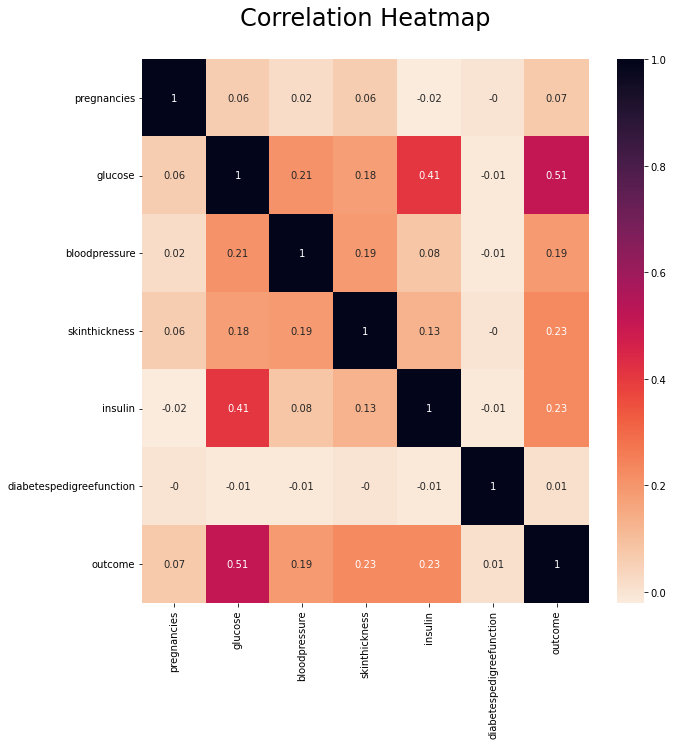

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heat map to see which features are correlated with our target outcome:

correlation = df.corr().round(2)

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

Analysis:

We can see from the heat map that glucose has the strongest positive correlation with outcome and diabetes pedigree function has the weakest positive correlation - we can assume that they are not correlated. I'd expect to see a linear or near-linear relationship between glucose levels and the likelihood that a patient has diabetes. The same could be true for insulin and skin thickness, both share a weaker correlations with our target. 

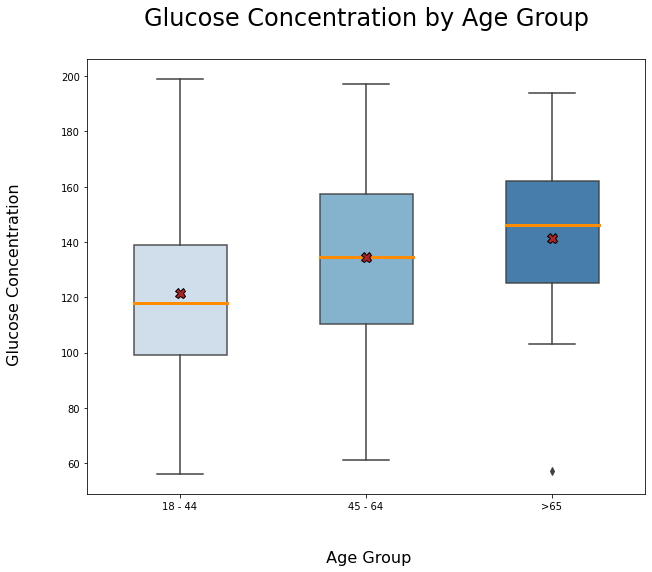

In [21]:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,8));

ag = sns.boxplot(data =df, x= 'agegroup', y = 'glucose', width=.5, palette='Blues', boxprops=dict(alpha=.9),
                 medianprops=dict(linestyle='-', linewidth=3, color='DarkOrange'), 
                 showmeans=True, 
                 meanprops=dict(marker='X', markersize= 10, 
                                markeredgecolor='black', 
                                markerfacecolor='firebrick'));
plt.title('Glucose Concentration by Age Group\n', fontsize =24)
plt.ylabel(' Glucose Concentration\n\n', fontsize=16);
plt.xlabel('\n\n Age Group', fontsize=16);

Analysis:

Looking at the upper, median, and lower quartile limits of each age group we can see that there is a trend toward higher glucose levels as patients age. ON average glucose increases with age, the patient with the highest glucose level belongs to the youngest age group howver. 

At a glance it appears that the 45-65 age group is symmetrically distributed on either side of glucose levels around ~ 135, this observation is supported by an equal mean and median. There is only one outlier for the entire distribution. One patient 65+ year old patient has a glucose level below 60, this is equal to or lower than the pateint with the lowest glucose levels in the youngest age group. 

## **DATA PREPARATION FOR MACHINE LEARNING**

In [22]:
# Preliminary check of the unadulterated dataframe copy:

dfML.columns = dfML.columns.str.lower()

dfML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               642 non-null    int64  
 1   glucose                   638 non-null    float64
 2   bloodpressure             616 non-null    float64
 3   skinthickness             455 non-null    float64
 4   insulin                   331 non-null    float64
 5   diabetespedigreefunction  642 non-null    object 
 6   weightgroup               642 non-null    object 
 7   agegroup                  642 non-null    object 
 8   gender                    642 non-null    object 
 9   outcome                   642 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 50.3+ KB


In [23]:
dfML.isna().sum()

pregnancies                   0
glucose                       4
bloodpressure                26
skinthickness               187
insulin                     311
diabetespedigreefunction      0
weightgroup                   0
agegroup                      0
gender                        0
outcome                       0
dtype: int64

In [24]:
# Addressing the inconsistencies:

dfML['weightgroup'].replace('MISSING', 'missing', inplace =True)

dfML['agegroup'].replace('<65', '>65', inplace = True)

dfML['gender'].replace('m','M', inplace =True )

dfML['diabetespedigreefunction'] = dfML['diabetespedigreefunction'].astype(float)

# Check:

dfML['weightgroup'].value_counts()

dfML['gender'].value_counts()

dfML['agegroup'].value_counts()

18 - 44    528
45 - 64    103
>65         11
Name: agegroup, dtype: int64

**ENCODING STRATEGY:**

weight group: ordinal 

age group: nominal 

gender: nominal 

weight group is ordinal because there is preference for healthy weight over underweight, and the various levels of obesity. Missing values will be the lowest in the order. 

gender and age group are nominal as no sex or age takes precedence over the others.

In [25]:
# Manual Ordinal Encoding of weight group:

dfML['weightgroup'].replace({'missing': 6, 'obsese_3': 5, 'obese_2': 4, 'obese_1' : 3, 'overweight': 2, 'underweight' : 1, 'healthy weight' :0}, inplace =True)

dfML['weightgroup'].value_counts()

3    196
2    146
4    126
5     87
0     75
6      8
1      4
Name: weightgroup, dtype: int64

## **VALIDATION SPLIT**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

# Validation Split 

X = dfML.drop(columns='outcome')
y = dfML['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [27]:
# Datatpye Selectors 

object_columns = make_column_selector(dtype_include = 'object')
object_columns(X_train)

['agegroup', 'gender']

**ENCODING STRATEGY:**

weight group: ordinal 

age group: nominal 

gender: nominal 

weight group is ordinal because there is preference for healthy weight over underweight, and the various levels of obesity. Missing values will be the lowest in the order. 

gender and age group are nominal as no sex or age takes precedence over the others.

In [28]:
dfML['weightgroup'].value_counts()

3    196
2    146
4    126
5     87
0     75
6      8
1      4
Name: weightgroup, dtype: int64

In [29]:
# Scalars and One Hot Encoding:

scaler = StandardScaler()

# Ordinal Scaler:

scaler2 = StandardScaler()

# OHE:

OHE = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

**IMPUTATION STRATEGY:**

ordinal column (weight group) will be paired with a 'missing' simple imputer. The missing value has been manualled encoded to a 6 so the missing imputer will fill the column with the number 6. 

nominal columns (gender, age group): will be paired with the most frequent imputer. 

numeric columns (pregnancies, glucose, blood pressure, skin thickness, insulin, and diabetes pedigree fucntion) will be paired with the mean imputer to address their respective missing values. 

In [30]:
# Imputation Strategies: 

missing_imputer = SimpleImputer(strategy='constant', fill_value= 6)
frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [31]:
# Column / Feature separation:

ordinal_columns = ['weightgroup']
nominal_columns = ['gender', 'agegroup']
numeric_columns = make_column_selector(dtype_include = 'number')

In [32]:
from pandas.core.arrays import numeric
# Creating pipelines:

ordinal_pipe = make_pipeline(missing_imputer, scaler2)
nominal_pipe = make_pipeline(frequent_imputer, OHE)
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Creating Tuples:

ordinal_tuple = (ordinal_pipe, ordinal_columns)
nominal_tuple = (nominal_pipe, nominal_columns)
numeric_tuple = (numeric_pipe, numeric_columns)

In [33]:
# Column Transfromer:

preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, numeric_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=6,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['weightgroup']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['gender', 'agegroup']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48b1ad15e0>)])

In [34]:
dfML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               642 non-null    int64  
 1   glucose                   638 non-null    float64
 2   bloodpressure             616 non-null    float64
 3   skinthickness             455 non-null    float64
 4   insulin                   331 non-null    float64
 5   diabetespedigreefunction  642 non-null    float64
 6   weightgroup               642 non-null    int64  
 7   agegroup                  642 non-null    object 
 8   gender                    642 non-null    object 
 9   outcome                   642 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 50.3+ KB


## **MODELING**

Our target 'outcome' has two options or classe: Diabetes (0 = no, 1 = yes) (target). This is a Binary Classification problem. 

In [35]:
X_train.shape

(481, 9)

In [36]:
y_train.shape

(481,)

In [37]:
# Checking class balance:

y_train.value_counts(normalize = True)

0    0.577963
1    0.422037
Name: outcome, dtype: float64

### CLASS BALANCE:

0:        57.80 %

1:        42.20 %

### **FIRST MODEL: BASIC DECISION TREE**

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Default Decision Tree Model:

DT = DecisionTreeClassifier(random_state = 42)

DT_pipe = make_pipeline(preprocessor, DT)

# Fitting the Data:

DT_pipe.fit(X_train, y_train)

# Predicitons:

DT_train_pred = DT_pipe.predict(X_train)
DT_test_pred = DT_pipe.predict(X_test)

# Model Score Evaluation:

print('Default Decision Tree Training Scores')
print(classification_report(y_train, DT_train_pred))
print('Default Decision Test Scores')
print(classification_report(y_test, DT_test_pred))


Default Decision Tree Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       203

    accuracy                           1.00       481
   macro avg       1.00      1.00      1.00       481
weighted avg       1.00      1.00      1.00       481

Default Decision Test Scores
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        93
           1       0.58      0.56      0.57        68

    accuracy                           0.65       161
   macro avg       0.64      0.63      0.63       161
weighted avg       0.64      0.65      0.64       161



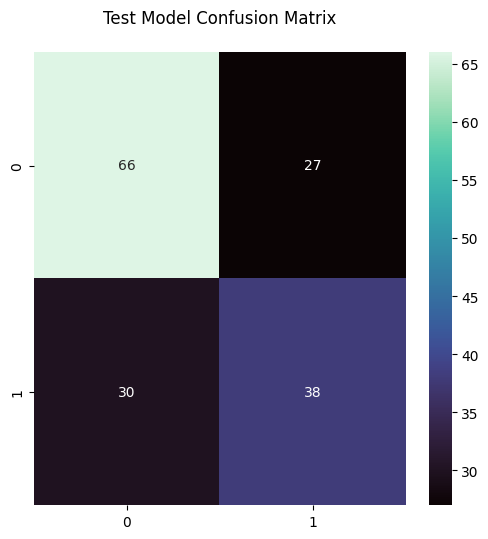

In [39]:
# Confusion Matrix:

DTcm = confusion_matrix(y_test.values, DT_test_pred)

fig, axes = plt.subplots(1, 1, figsize=(6,6), dpi=100);
sns.heatmap(DTcm, cmap='mako', ax=axes, annot=True);
axes.set_title('Test Model Confusion Matrix\n');

True Positives: 38

True Negatives: 70

False Positives: 23

False Negatives: 30

Test Model Percentage Confusion Matrix



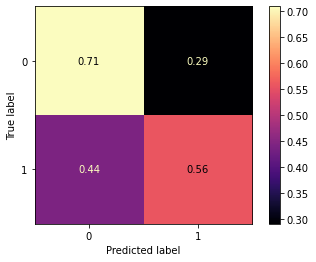

In [40]:
print('Test Model Percentage Confusion Matrix\n')
ConfusionMatrixDisplay.from_predictions(y_test, DT_test_pred, cmap='magma', normalize = 'true');

In [41]:
# Checking model documentation for available hyperparameters:

DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [42]:
# Default Decision Tree Model:

DT2 = DecisionTreeClassifier(max_leaf_nodes = 2, max_depth = 5, 
                             min_samples_split = 6, random_state = 42)

DT2_pipe = make_pipeline(preprocessor, DT2)

# Fitting the Data:

DT2_pipe.fit(X_train, y_train)

# Predicitons:

DT2_train_pred = DT2_pipe.predict(X_train)
DT2_test_pred = DT2_pipe.predict(X_test)

# Model Score Evaluation:

print('Second Decision Tree Model Training Scores')
print(classification_report(y_train, DT2_train_pred))
print('Second Decision Tree Model Test Scores')
print(classification_report(y_test, DT2_test_pred))


Second Decision Tree Model Training Scores
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       278
           1       0.81      0.47      0.60       203

    accuracy                           0.73       481
   macro avg       0.76      0.70      0.70       481
weighted avg       0.75      0.73      0.71       481

Second Decision Tree Model Test Scores
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        93
           1       0.75      0.40      0.52        68

    accuracy                           0.69       161
   macro avg       0.71      0.65      0.64       161
weighted avg       0.70      0.69      0.66       161



Confusion Matrix for Second Decision Tree Model



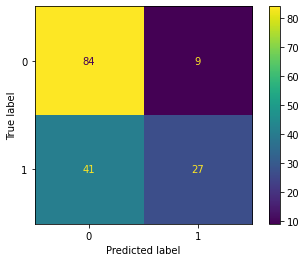

In [43]:
print('Confusion Matrix for Second Decision Tree Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, DT2_test_pred);

True Positives: 27

True Negatives: 84

False Positives: 9

False Negatives: 41

In [44]:
# Best Decision Tree Model with tuned hyperparameters:

# List of hyperparameters that will be tuned:
md_val = []       # max_depth
ln_val = []       # max_leaf_nodes
mss_val = []      # min_samples_split
accscore = []     # accuracy score

# Loop to interate through hyperparameters:

for md in range(1,10):
  for ln in range(8,10):
    for mss in range(8,10):

      # Model Instantiation:
      BDT = DecisionTreeClassifier(max_depth = md, 
                                   max_leaf_nodes = ln, min_samples_split = mss)
      # Pipeline & Fit:
      BDT_pipe = make_pipeline(preprocessor, BDT)
      BDT_pipe.fit(X_train, y_train)
      test_score = BDT_pipe.score(X_test, y_test)

      # Adding test scores to the list:
      md_val.append(md)
      ln_val.append(ln)
      mss_val.append(mss)
      accscore.append(test_score)

In [45]:
# Test Score Data Frame:

accuracydf = pd.DataFrame()
accuracydf['max_depth'] = md_val
accuracydf['max_leaf_nodes'] = ln_val
accuracydf['min_samples_split'] = mss_val
accuracydf['accuracy_score'] = accscore

accuracydf.head()

,max_depth,max_leaf_nodes,min_samples_split,accuracy_score
0,1,8,8,0.689441
1,1,8,9,0.689441
2,1,9,8,0.689441
3,1,9,9,0.689441
4,2,8,8,0.689441


In [46]:
accuracydf.sort_values(by= 'accuracy_score', ascending = False)

# Best hyperparameters for the Decision Tree Model:

accuracydf.iloc[13]

max_depth            4.000000
max_leaf_nodes       8.000000
min_samples_split    9.000000
accuracy_score       0.732919
Name: 13, dtype: float64

In [47]:
# Best Decision Tree Model:

BDT = DecisionTreeClassifier(max_leaf_nodes = 8, max_depth = 4, 
                             min_samples_split = 9, random_state = 42)

BDT_pipe = make_pipeline(preprocessor, BDT)

# Fitting the Data:

BDT_pipe.fit(X_train, y_train)

# Predicitons:

BDT_train_pred = BDT_pipe.predict(X_train)
BDT_test_pred = BDT_pipe.predict(X_test)

# Model Score Evaluation:

print('Best Decision Tree Model Training Scores')
print(classification_report(y_train, BDT_train_pred))
print('Best Decision Tree Model Test Scores')
print(classification_report(y_test, BDT_test_pred))

Best Decision Tree Model Training Scores
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       278
           1       0.70      0.77      0.73       203

    accuracy                           0.77       481
   macro avg       0.76      0.77      0.76       481
weighted avg       0.77      0.77      0.77       481

Best Decision Tree Model Test Scores
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        93
           1       0.68      0.69      0.69        68

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



Confusion Matrix for Best Decision Tree Model



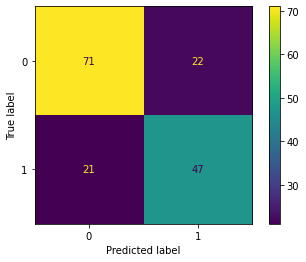

In [48]:
print('Confusion Matrix for Best Decision Tree Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, BDT_test_pred);

True Positives: 47

True Negatives: 71

False Positives: 22

False Negatives: 21

### **SECOND MODEL: K NEAREST NEIGHBORS CLASSIFIER**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Default Nearest Neighbor Model:

# Preporcessor and Model addition to pipeline:

KN = KNeighborsClassifier()

KN_pipe = make_pipeline(preprocessor, KN)

# Fitting the Data:

KN_pipe.fit(X_train, y_train)

# Predictions: 

KN_train_pred = KN_pipe.predict(X_train)
KN_test_pred = KN_pipe.predict(X_test)

# Model Evaluation:

print('Default Nearest Neighbor Training Scores')
print(classification_report(y_train, KN_train_pred))
print('Default Nearest Neighbor Test Scores')
print(classification_report(y_test, KN_test_pred))

Default Nearest Neighbor Training Scores
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       278
           1       0.76      0.74      0.75       203

    accuracy                           0.79       481
   macro avg       0.79      0.79      0.79       481
weighted avg       0.79      0.79      0.79       481

Default Nearest Neighbor Test Scores
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        93
           1       0.60      0.57      0.59        68

    accuracy                           0.66       161
   macro avg       0.65      0.65      0.65       161
weighted avg       0.66      0.66      0.66       161



Confusion Matrix for Default Nearest Neighbors Model



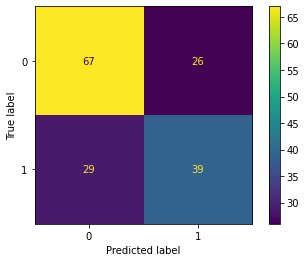

In [50]:
print('Confusion Matrix for Default Nearest Neighbors Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, KN_test_pred);

True Positives: 39

True Negatives: 67

False Positives: 26

False Negatives: 29

In [51]:
KN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [52]:
# Second Nearest Neighbor Model:

# Preporcessor and Model addition to pipeline:

KN2 = KNeighborsClassifier(leaf_size = 20, n_jobs= 5, n_neighbors= 3, weights = 'distance')

KN2_pipe = make_pipeline(preprocessor, KN2)

# Fitting the Data:

KN2_pipe.fit(X_train, y_train)

# Predictions: 

KN2_train_pred = KN2_pipe.predict(X_train)
KN2_test_pred = KN2_pipe.predict(X_test)

# Model Evaluation:

print('Second Nearest Neighbor Training Scores')
print(classification_report(y_train, KN2_train_pred))
print('Second Nearest Neighbor Test Scores')
print(classification_report(y_test, KN2_test_pred))

Second Nearest Neighbor Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       203

    accuracy                           1.00       481
   macro avg       1.00      1.00      1.00       481
weighted avg       1.00      1.00      1.00       481

Second Nearest Neighbor Test Scores
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        93
           1       0.61      0.60      0.61        68

    accuracy                           0.67       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.67      0.67      0.67       161



Confusion Matrix for Second Nearest Neighbors Model



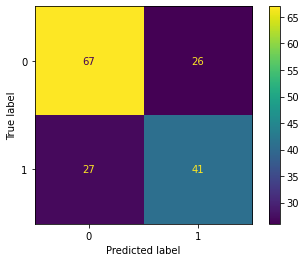

In [53]:
print('Confusion Matrix for Second Nearest Neighbors Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, KN2_test_pred);

True Positives: 41

True Negatives: 67

False Positives: 26

False Negatives: 27

In [54]:
KN2.get_params()

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 5,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [55]:
# Best Nearest Neighbor Model via GridSearch Cross Validation:

# Creating parameter dictionary:

parameters = {'kneighborsclassifier__n_neighbors': range(1,5), 
              'kneighborsclassifier__n_jobs' : range(1,5), 
              'kneighborsclassifier__p' : range(1,3),
              'kneighborsclassifier__weights':['uniform','distance']}
                                              
# Model Insatiation, pipeline creation and fit using GridSearchCV:       
KN_pipe_best = make_pipeline(preprocessor, KN)  

KN_grid = GridSearchCV(KN_pipe_best, parameters, cv = 2)

# Fit:

KN_grid.fit(X_train, y_train)

# Optimal combination of hyperparameters:

KN_grid.best_params_

{'kneighborsclassifier__n_jobs': 1,
 'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'distance'}

In [56]:
BKN = KN_grid.best_estimator_


In [57]:
# Training and Test predictions:

BKN_train_pred = BKN.predict(X_train)
BKN_test_pred = BKN.predict(X_test)

# Model Evaluation:

print('Best Nearest Neighbor Training Scores')
print(classification_report(y_train, BKN_train_pred))
print('Best Nearest Neighbor Test Scores')
print(classification_report(y_test, BKN_test_pred))

Best Nearest Neighbor Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       203

    accuracy                           1.00       481
   macro avg       1.00      1.00      1.00       481
weighted avg       1.00      1.00      1.00       481

Best Nearest Neighbor Test Scores
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        93
           1       0.66      0.59      0.62        68

    accuracy                           0.70       161
   macro avg       0.69      0.68      0.68       161
weighted avg       0.69      0.70      0.69       161



Confusion Matrix for Best K Nearest Neighbors Model



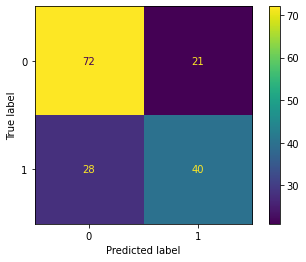

In [58]:
print('Confusion Matrix for Best K Nearest Neighbors Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, BKN_test_pred);

True Positives: 40

True Negatives: 72

False Positives: 21

False Negatives: 28

## **FINAL MODEL CHOICE:**

Best Decision Tree Model. Our goal is to predict whether a patient has (1) or does not (0) have Diabetes. We are looking for a model that will minimize false negatives or type II errors as they would be detrimental to the patient's health. A test result that indicates that a patient does not have Diabetes when they actually do would cause a tremendous amount of health and financial related issues for the patient and their family, as well as competency concerns and legal issues for the doctor / hospital conducting the diagnosis. A foucs on minimizing false negatives and finding the true positives put recall at the fore front of the selection criteria. The Best Decision Tree's test model has the lowest number of False Negatives the highest accuracy, with a 57.8% / 42.2% class split, and the highest recall score for the positive class. It is the best model for this instance.

Best Decision Tree Model:

True Positives: 47

True Negatives: 71

False Positives: 22

False Negatives: 21


Confusion Matrix for Best Decision Tree Model



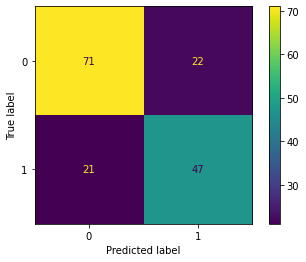

In [59]:
print('Confusion Matrix for Best Decision Tree Model\n')

ConfusionMatrixDisplay.from_predictions(y_test, BDT_test_pred);